# **Data collection**

**Import videos-stats.csv**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session


Saving comments.csv to comments.csv
Saving videos-stats.csv to videos-stats.csv


In [ ]:
df_videos = pd.read_csv("videos-stats.csv", index_col=0) 
df_videos

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0
1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN


In [ ]:
df_videos_missing_val_count_by_column = (df_videos.isnull().sum())
df_videos_missing_val_count_by_column

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [ ]:
df_videos = df_videos.dropna()
df_videos

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861.0,184.0,37959.0
1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615.0,648.0,319957.0
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0


**Import comments csv**

In [ ]:
df_comments = pd.read_csv("comments.csv", index_col = 0) 
df_comments

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0.0,2.0
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20.0,2.0
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1.0,1.0
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35.0,2.0


In [ ]:
df_comments_missing_val_count_by_column = (df_comments.isnull().sum())
df_comments_missing_val_count_by_column

Video ID     0
Comment      1
Likes        0
Sentiment    0
dtype: int64

# **Data exploration, visualization, and processing**

In [ ]:
df_videos[['Likes','Comments','Views']].describe()

,Likes,Comments,Views
count,1.879000e+03,1879.000000,1.879000e+03
mean,1.700610e+05,7863.331559,1.161292e+07
std,7.962293e+05,37879.964926,1.084450e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.672500e+03,199.000000,8.451500e+04
50%,1.478700e+04,814.000000,5.917210e+05
75%,6.090600e+04,3377.500000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


In [ ]:
df_videos[['Likes','Comments','Views']].corr()

,Likes,Comments,Views
Likes,1.000000,0.892284,0.754475
Comments,0.892284,1.000000,0.659654
Views,0.754475,0.659654,1.000000


In [ ]:
df_comments[['Likes','Sentiment']].describe()

,Likes,Sentiment
count,18409.000000,18409.000000
mean,1040.019447,1.493998
std,10651.366148,0.709928
min,0.000000,0.000000
25%,5.000000,1.000000
50%,29.000000,2.000000
75%,190.000000,2.000000
max,891372.000000,2.000000


In [ ]:
df_comments[['Likes','Sentiment']].corr()

,Likes,Sentiment
Likes,1.000000,-0.027767
Sentiment,-0.027767,1.000000


**Explore data and add one more variable that is polarity.**

In [ ]:
df_comments_polarity = df_comments.copy()
test_subset = df_comments_polarity['Comment'].astype(str)

In [ ]:
text= []
value=[]

# Generate the score of polarity based on TextBlob package
for i in range(len(df_comments_polarity)):
  text.append(TextBlob(test_subset[i]))
  value.append(text[i].sentiment.polarity)

df_comments_polarity['Polarity'] = value
df_comments_polarity

,Video ID,Comment,Likes,Sentiment,Polarity
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,0.075606
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,0.160000
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,0.000000
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0,-0.183333
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,0.208333
...,...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0.0,2.0,0.344048
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20.0,2.0,0.350000
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1.0,1.0,-0.800000
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35.0,2.0,0.000000


**Merge video_stats and comment files into one file.**

In [ ]:
df = pd.merge(df_videos,df_comments_polarity,how='outer',on='Video ID')
df = df.dropna()
df

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment,Polarity
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,0.075606
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,0.160000
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0,0.000000
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0,-0.183333
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,0.208333
...,...,...,...,...,...,...,...,...,...,...,...
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0,0.375000
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0,0.500000
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0,0.600000
18623,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0,0.293333


**PCA on videos_stats**

In [ ]:
import pandas as pd
df_copy = df_videos.copy()
df_head5 = pd.DataFrame()
df_copy['Ratio %'] = (df_copy['Likes']/df_copy['Views'])*100

for i in range(len(df_copy['Keyword'].unique())):
  df_head5 = df_head5.append(df_copy[df_copy['Keyword'] == df_copy['Keyword'].unique()[i]].sort_values(by='Ratio %', ascending=False).head(5))
df_head5 = df_head5.reset_index().drop(['index'], axis=1)
df_head5.head(10)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Ratio %
0,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0,7.754318
1,Neil Gaiman Answers Mythology Questions From T...,o-jUQhCeazQ,2022-08-04,tech,43960.0,1767.0,791624.0,5.553141
2,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0,5.201051
3,Cool Tech Under $50 - August!,pT_9hntWj34,2022-08-06,tech,20999.0,3091.0,413179.0,5.082301
4,Dope Tech: The Most Extreme Gaming Monitor!,MEiq0oCUb_8,2022-08-15,tech,118001.0,4123.0,2359142.0,5.001861
5,JORNAL DA MANHÃ - 24/08/2022,0IH09JBETbI,2022-08-24,news,23828.0,47.0,500097.0,4.764676
6,Netanyahu: This will make the Middle East a nu...,Tey5qEth4oA,2022-08-24,news,8484.0,2192.0,237313.0,3.575025
7,Biden plans to forgive $300 billion in student...,OTFKyW-vc_Y,2022-08-24,news,1573.0,2670.0,60528.0,2.598797
8,Biden Announces Plan For Federal Student Loan ...,fNHmQdrlIZE,2022-08-24,news,1200.0,2841.0,54596.0,2.197963
9,T. Raja Singh News: T. Raja Singh को जमानत मिल...,CBNHQyXOcjE,2022-08-23,news,1688.0,796.0,89985.0,1.875868


In [ ]:
import numpy as np
import pandas as pd
n_components = 2 

X_mean = df_head5.iloc[:, 4:6] - np.mean(df_head5.iloc[:, 4:6])
cov_matrix = np.cov(X_mean, rowvar=False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_matrix)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()

pca_df = pd.DataFrame(X_reduced, columns = ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,40285.603921,2444.876461
1,67845.342189,811.369922
2,15191.336356,-111.680868
3,90719.140175,-1586.517205
4,-6224.753257,1925.541180
...,...,...
200,98695.389205,751.494007
201,-352005.996318,391.943006
202,67603.564020,1142.056053
203,109972.284861,420.996862


[Text(0.5, 1.0, '2D plane')]

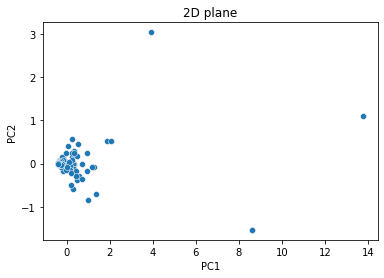

In [ ]:
from re import X
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

df_pca = df_head5.iloc[:, 4:6]
pca = PCA(n_components=2)
df_pca = preprocessing.scale(df_pca)
pca.fit(df_pca)
pca_df = pca.transform(df_pca)
x = pd.DataFrame(pca_df, columns=['PC1','PC2'])
pca_df

sns.scatterplot(data= x, x = 'PC1', y = 'PC2').set(title='2D plane')

**Data visualization**

In [ ]:
import plotly.express as px
import numpy as np
fig = px.treemap(df_head5, path=[px.Constant("YouTube stats"), 'Keyword', 'Title'], values=df_head5['Ratio %'])
fig.show()

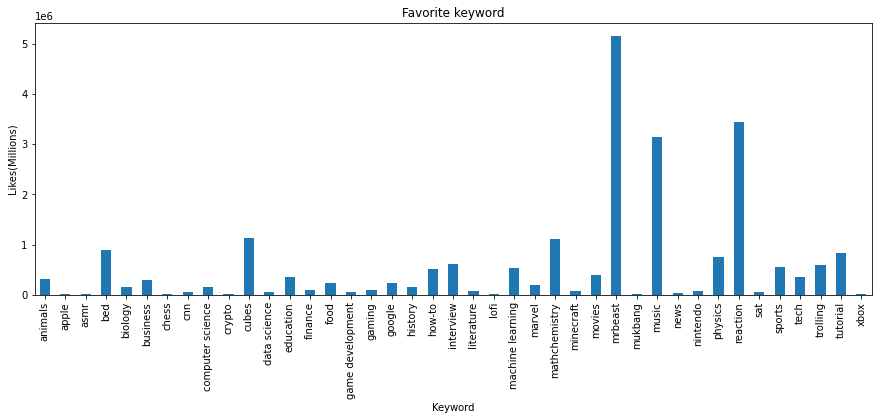

In [ ]:
df_sec = df_head5[['Keyword','Likes']]

dfg = df_sec.groupby(['Keyword'])['Likes'].sum()

dfg.plot(kind='bar', title='Favorite keyword', ylabel='Likes(Millions)',
         xlabel='Keyword', figsize=(15,5))

In [ ]:
px.histogram(df_head5, x='Published At')

**Calculate the views of max value, min value, and average etc.**

In [ ]:
stats_views_df = df_head5[['Keyword', 'Views']].groupby(['Keyword']).agg(['max', 'min', 'mean','sum'])
stats_views_df.sort_values(by=('Views', 'sum'), ascending=False).style.background_gradient(cmap='Blues')

# **Model exploration and model selection**

# **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from textblob import TextBlob
from google.colab import files
 

In [ ]:
df

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment,Polarity
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,0.075606
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,0.160000
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0,0.000000
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0,-0.183333
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,0.208333
...,...,...,...,...,...,...,...,...,...,...,...
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0,0.375000
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0,0.500000
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0,0.600000
18623,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0,0.293333


In [ ]:
feature_cols = ['Polarity','Likes_y'] #'Likes_x','Comments','Views',	'Likes_y', 'Polarity'
X = df[feature_cols] # Features
y = df.Sentiment # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2 )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

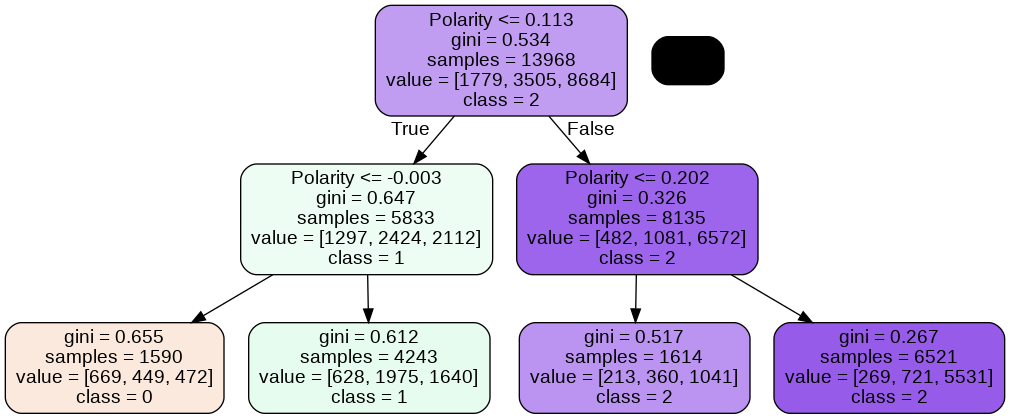

In [ ]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, feature_names = feature_cols, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')
Image(graph.create_png())

**Data exploration (Standardization )**

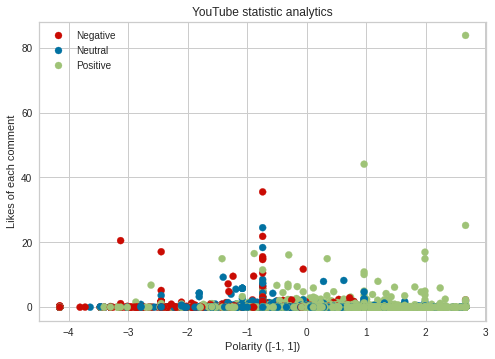

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
df_std = df.copy()
data = df_std[['Polarity','Likes_y']]
standard = preprocessing.scale(data)
standard = pd.DataFrame(standard, columns = ['Polarity','Likes_y'])
x = standard['Polarity']
y = standard['Likes_y']

classes = ['Negative', 'Neutral', 'Positive']
values = df['Sentiment']
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(x, y, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("YouTube statistic analytics")
plt.xlabel("Polarity ([-1, 1])")
plt.ylabel("Likes of each comment")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.40      0.37      0.38       573
         1.0       0.47      0.58      0.52      1189
         2.0       0.81      0.75      0.78      2894

    accuracy                           0.66      4656
   macro avg       0.56      0.56      0.56      4656
weighted avg       0.67      0.66      0.66      4656



In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob, pos_label='Sentiment')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



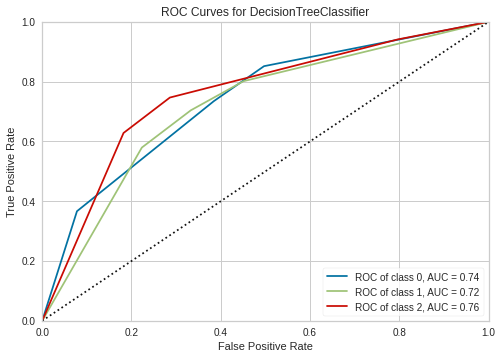

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf, classes=["0", "1", "2"], micro=False, macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                      index = ['0','1','2'], 
                     columns = ['Negative','Neutral','Positive'])


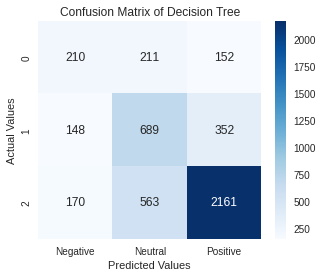

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='.0f')
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# **Linear Discriminant Analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from textblob import TextBlob
from google.colab import files

 

In [ ]:
#file = files.upload()

In [ ]:
X = df[feature_cols] # Features
y = df.Sentiment # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold()

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy:" + str(np.mean(scores)) )

Accuracy:0.6273732668199742


In [ ]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.06      0.11       576
         1.0       0.30      0.08      0.13      1191
         2.0       0.65      0.96      0.78      2889

    accuracy                           0.63      4656
   macro avg       0.49      0.37      0.34      4656
weighted avg       0.55      0.63      0.53      4656



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



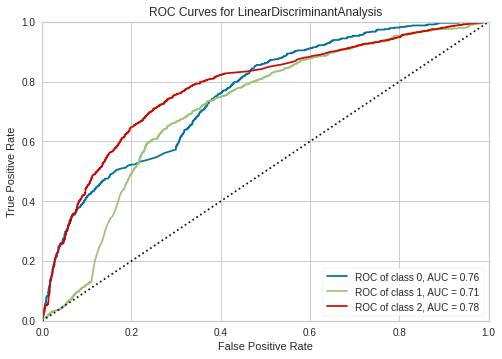

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model, classes=["0", "1", "2"], micro=False, macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

# **Naive Bayes Classifiers**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df[feature_cols]
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 66.0008591065292


In [ ]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.05      0.00      0.00       598
         1.0       0.44      0.55      0.49      1124
         2.0       0.76      0.84      0.80      2934

    accuracy                           0.66      4656
   macro avg       0.41      0.46      0.43      4656
weighted avg       0.59      0.66      0.62      4656



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



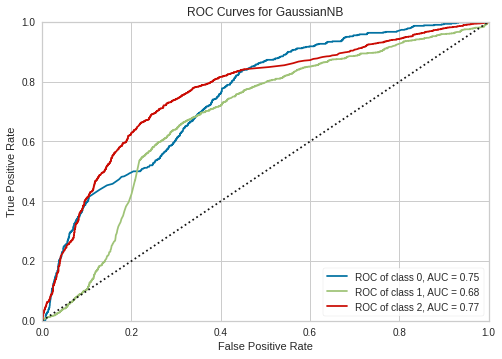

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(gnb, classes=["0", "1", "2"], micro=False, macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

# **K-NN classification model**

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
kNN_classifier.fit(X_train, y_train)
pred = kNN_classifier.predict(X_test)
print('Validation Error: ', 1-accuracy_score(y_test, pred))

Validation Error:  0.4110824742268041


In [ ]:
validation_error = 0
auc = 0
k = 0
df_results = pd.DataFrame(columns = ['k', 'Validation Error'])
for i in range(1, 21):
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  kNN_classifier.fit(X_train, y_train)
  pred = kNN_classifier.predict(X_test)
  k = i
  validation_error = 1-accuracy_score(y_test, pred)
  df_results.loc[i] = [k, validation_error]
print(df_results)

       k  Validation Error
1    1.0          0.428265
2    2.0          0.490335
3    3.0          0.411082
4    4.0          0.394545
5    5.0          0.390893
6    6.0          0.379725
7    7.0          0.376074
8    8.0          0.370704
9    9.0          0.359107
10  10.0          0.358247
11  11.0          0.354167
12  12.0          0.353308
13  13.0          0.353952
14  14.0          0.357174
15  15.0          0.350730
16  16.0          0.352234
17  17.0          0.347723
18  18.0          0.348153
19  19.0          0.348797
20  20.0          0.351589


# **Logistic regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Likes_x','Comments','Views','Likes_y']], df['Sentiment'], test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(model.coef_)

              precision    recall  f1-score   support

         0.0       0.13      0.00      0.01       607
         1.0       0.30      0.04      0.08      1142
         2.0       0.63      0.96      0.76      2907

    accuracy                           0.61      4656
   macro avg       0.35      0.34      0.28      4656
weighted avg       0.48      0.61      0.49      4656

[[-8.19664543e-07  1.28018065e-06 -1.74369307e-09  2.45351622e-06]
 [ 2.54270840e-07 -5.03669432e-06  2.08916365e-09  1.29501573e-06]
 [ 5.65393703e-07  3.75651367e-06 -3.45470595e-10 -3.74853195e-06]]


# **Linear regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Likes_x','Views','Likes_y','Sentiment']], df['Comments'], test_size=0.25)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('R^2 Value: ', regr.score(X_train, y_train))
print('Coefficients: ',regr.coef_)
print('Intercept:', regr.intercept_)

R^2 Value:  0.8163910943762183
Coefficients:  [ 4.34138461e-02 -1.24441603e-05  5.77272630e-02 -7.52971405e+02]
Intercept: 1734.0904412763257


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = mean_absolute_percentage_error(y_test, pred)